# Práctica Final: Clasificación de Documentos con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación de documentos. El objetivo es construir un modelo capaz de clasificar automáticamente documentos en categorías predefinidas.

Pasos a seguir:

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [1]:
! pip install mlflow

In [2]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

In [5]:
df.shape

(569, 31)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
# Observamos si hay algun valor nulo

df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

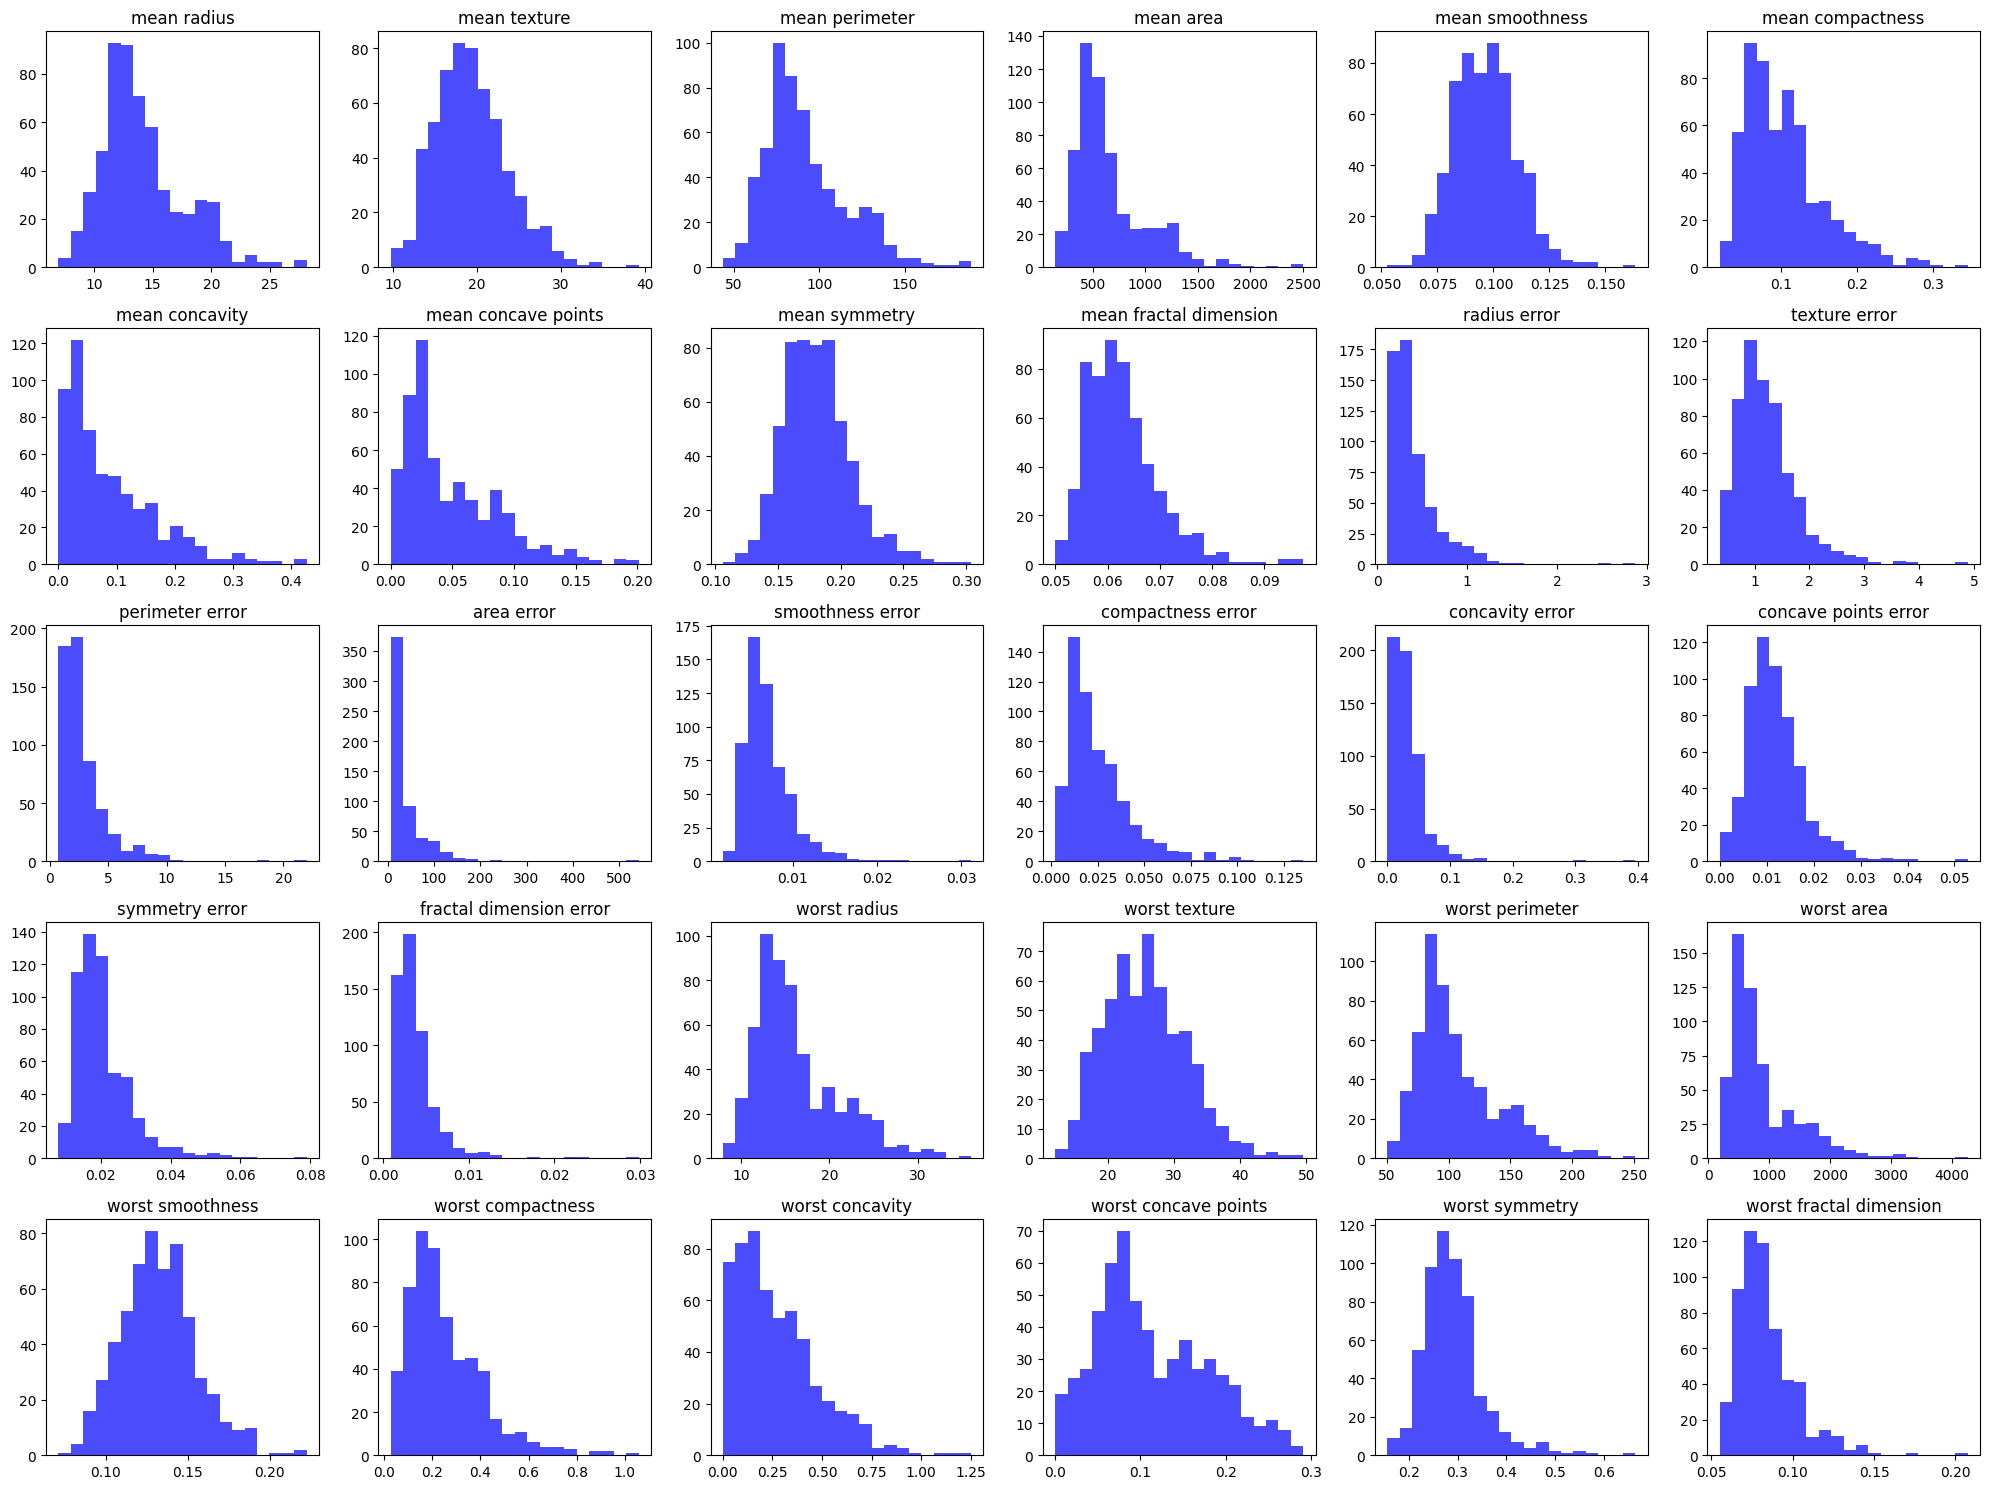

In [8]:
# Obtener nombres de las características
feature_names = cancer['feature_names']

# Trazar histogramas de características
plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_names):
    plt.subplot(5, 6, i + 1)
    plt.hist(df[feature], bins=20, color='blue', alpha=0.7)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [9]:
# Dividimos en train 75% - test 25%
train, test = train_test_split(df, test_size=0.25)


In [10]:
train.shape, test.shape

((426, 31), (143, 31))

In [11]:
# Guardamos train y test en archivo csv
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [12]:
# Separamos el target de las features
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.25,
                                                            random_state=42,
                                                            stratify=y_raw)

In [13]:
# Configuramos el clasificador y escalamos los datos
lr = LogisticRegression(C=1,
                         class_weight='balanced',
                         random_state=42)

preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('LogisticRegression', lr)])

In [14]:
# Entrenamos el modelo
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('LogisticRegression',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42))])

In [15]:
# Evaluamos el modelo y obtenemos las métricas
accuracy_train = model.score(x_train, y_train)

# Calculamos las métricas usando validación cruzada
precision_train = cross_val_score(model, x_train, y_train, cv=5, scoring='precision')
recall_train = cross_val_score(model, x_train, y_train, cv=5, scoring='recall')

print('Accuracy train:', accuracy_train)
print('Precision train:', precision_train.mean())
print('Recall train:', recall_train.mean())

Accuracy train: 0.9968652037617555
Precision train: 0.9852439024390243
Recall train: 0.985


In [16]:
# Evaluamos en test
accuracy_test = model.score(x_test, y_test)

# Predecimos en test
y_pred = model.predict(x_test)

# calculamos la precisión y recall en test
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)

print('Accuracy test:', accuracy_test)
print('Precision:', precision_test)
print('Recall:', recall_test)

Accuracy test: 0.9626168224299065
Precision: 0.9565217391304348
Recall: 0.9850746268656716


In [17]:
# Obtenemos los parámetros
model.get_params()

{'memory': None,
 'steps': [('preprocessor', Pipeline(steps=[('scaler', StandardScaler())])),
  ('LogisticRegression',
   LogisticRegression(C=1, class_weight='balanced', random_state=42))],
 'verbose': False,
 'preprocessor': Pipeline(steps=[('scaler', StandardScaler())]),
 'LogisticRegression': LogisticRegression(C=1, class_weight='balanced', random_state=42),
 'preprocessor__memory': None,
 'preprocessor__steps': [('scaler', StandardScaler())],
 'preprocessor__verbose': False,
 'preprocessor__scaler': StandardScaler(),
 'preprocessor__scaler__copy': True,
 'preprocessor__scaler__with_mean': True,
 'preprocessor__scaler__with_std': True,
 'LogisticRegression__C': 1,
 'LogisticRegression__class_weight': 'balanced',
 'LogisticRegression__dual': False,
 'LogisticRegression__fit_intercept': True,
 'LogisticRegression__intercept_scaling': 1,
 'LogisticRegression__l1_ratio': None,
 'LogisticRegression__max_iter': 100,
 'LogisticRegression__multi_class': 'auto',
 'LogisticRegression__n_jobs

### Regristro y despliegue del modelo con MLflow

In [18]:
#! pip install pyngrok

In [19]:

# Iniciar un nuevo run de MLflow
with mlflow.start_run(run_name='Despliegue de Modelo ML'):
    # Registrar métricas y parámetros en MLflow
    mlflow.sklearn.log_model(model, 'lr_model')
    mlflow.log_metric('accuracy_test', accuracy_test)
    mlflow.log_metric('precision_test', precision_test)
    mlflow.log_metric('recall_test', recall_test)
    mlflow.log_param('C', 1.0)

# Imprimir la URL de MLflow UI
print('El tracking UI de MLflow:')
print(mlflow.get_tracking_uri())

El tracking UI de MLflow:
file:///content/mlruns


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


![image.png](attachment:image.png)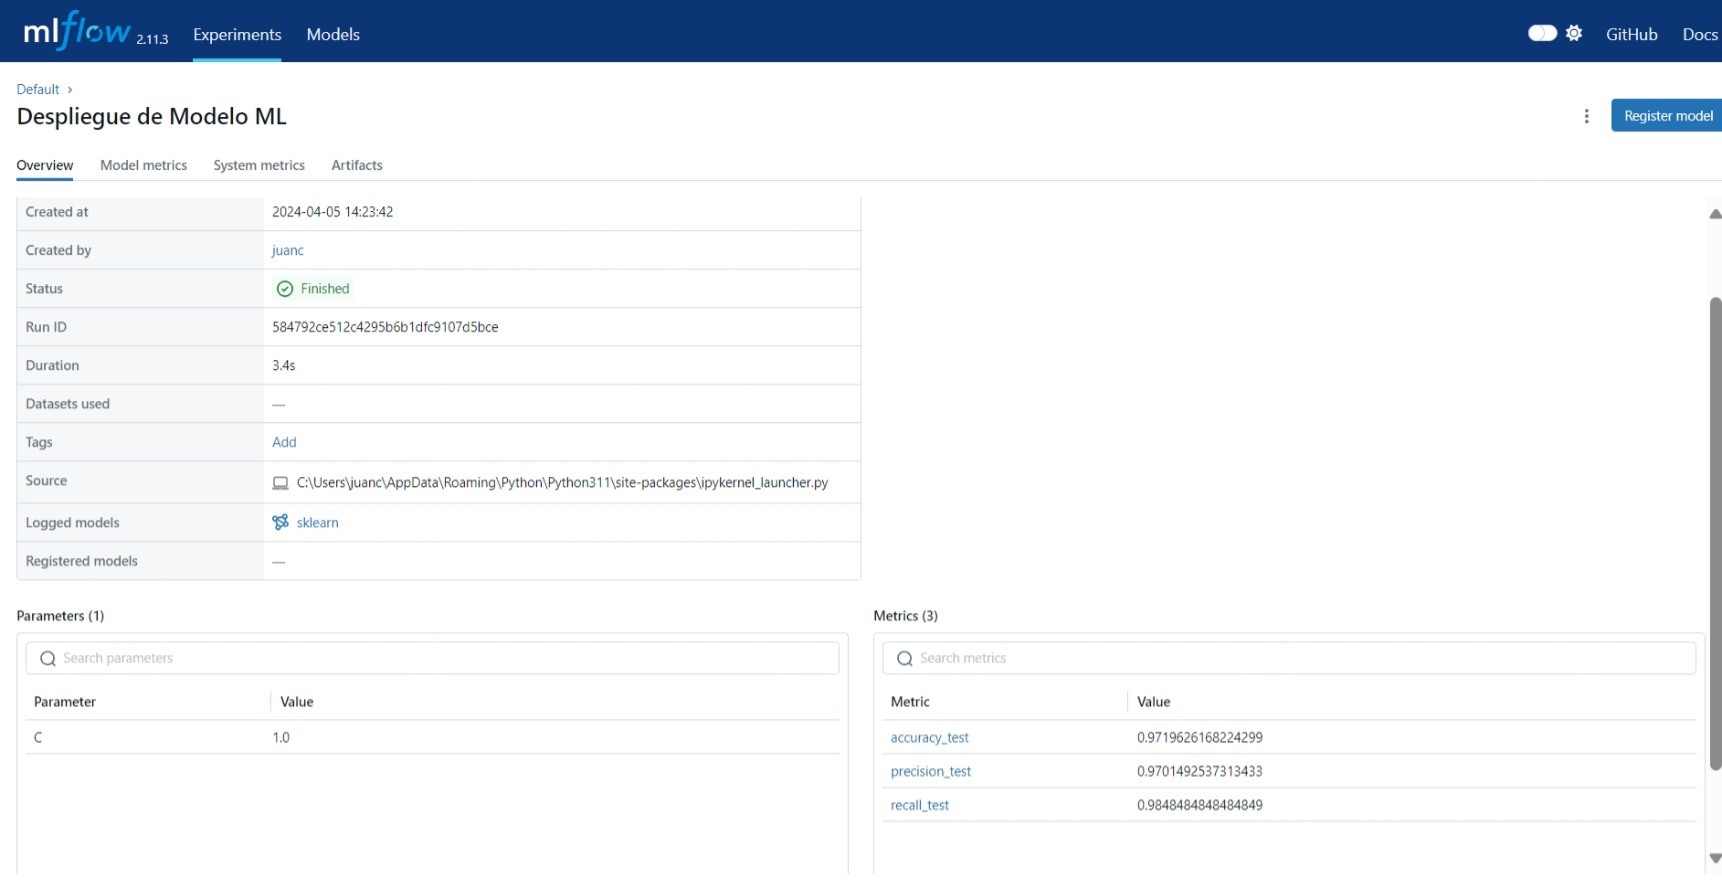

# REALIZO EL TRABAJO DESDE LOCAL CON VISUAL STUDIO CODE YA QUE CON NGROK ME HA DADO BASTANTES PROBLEMAS DICIENDO QUE EL PUERTO 5000 NO EXISTE. LAMENTO NO HABER PUESTO UN PANTALLAZO DEL ERROR, PERO SI HE REALIZADO LA EJECUCION DEL MODELO Y COMO SE OBSERVA EN LA FOTO, SE VEN LAS METRICAS, EL PARÁMETRO Y EL MODELO LOGEADO.

# Práctica Final: detección de mensajes troll



En los últimos años Twitch se ha consolidado como uno de los principales medios de comunicación especialmente para las generaciones más jóvenes.

Al tratarse de una plataforma participativa en la que los usuarios pueden poner comentarios durante y posteriormente a las emisiones. Entre estos comentarios han aparecido como siempre comentarios ofensivos.

En esta práctica construiremos una Inteligencia Artificial capaz de clasificar esos mensajes troll.

Durante la práctica entrenaremos el modelo de Deep Learning y lo desplegaremos para inferencia en batch, la más habitual actualmente dentro de la industria:

## Teoría

**1. ¿Qué es Apache Beam?**

Apache Beam es un framework de trabajo que permite definir pipelines de procesado de datos enfocadas a la paralelización de procesos.

Beam es una abstracción por lo que los detalles de implementación son gestionados por los motores de ejecución (Flink, DataFlow...)

Es un framework compatible con distintos lenguajes de programación como Java, Python o Go.

**2. ¿Cuáles son las diferentes formas de desplegar un modelo?**

Distinguimos cuatro opciones:

* Despligue en Batch. Desplegamos el modelo para hacer predicciones de grandes cantidades de datos en un momento puntual.

* Despligue online. Permite la disponibilización del modelo a demanda por el ususario de manera que se pueden realizar predicciones mediante llamadas a APIs.

* Despliegue en streaming Despligue pensando en la recepción continua de datos de manera que nuestro servidor es capaz de procesar un flujo continuo e ininterrumpido de datos en tiempo real.

* ML Automatizado. Es el estado más avanzado en el desarrollo de MLOPS en el que el modelo es monitoeado y reentrenado de manera automática.

**3. ¿Cuál es la principal diferencia entre la inferencia en batch y la inferencia en streaming?**

La inferencia en batch procesa grandes cantidades de datos en momentos puntuales y normalmente programados de antemano frente al procesamiento en streming cuya infrastructura está diseñada para estar constantemente en funcionamiento emitiendo predicciones de manera continua y en tiempo real (o casi).



# Configuración de nuestro proyecto en GCP


In [20]:
PROJECT_ID = "imp-algo-jcg" #@param {type:"string"}
! gcloud config set project $PROJECT_ID

Updated property [core/project].


In [21]:

import sys

# If you are running this notebook in Colab, run this cell and follow the
# instructions to authenticate your GCP account. This provides access to your
# Cloud Storage bucket and lets you submit training jobs and prediction
# requests.

if 'google.colab' in sys.modules:
  from google.colab import auth as google_auth
  google_auth.authenticate_user()

# If you are running this notebook locally, replace the string below with the
# path to your service account key and run this cell to authenticate your GCP
# account.
else:
  %env GOOGLE_APPLICATION_CREDENTIALS ''

Creamos el bucket mediante la consola y una vez creado lo indicamos en la variable:

In [22]:
BUCKET_NAME = "imp-algo-jcg" #@param {type:"string"}
REGION = "europe-west1" #@param {type:"string"}

In [23]:
! gsutil mb -l $REGION gs://$BUCKET_NAME

Creating gs://imp-algo-jcg/...
ServiceException: 409 A Cloud Storage bucket named 'imp-algo-jcg' already exists. Try another name. Bucket names must be globally unique across all Google Cloud projects, including those outside of your organization.


# Entrenamiento e inferencia en Batch

## Preparación

Para esta primera parte se va a utilizar [Tweets Dataset for Detection of Cyber-Trolls](https://www.kaggle.com/dataturks/dataset-for-detection-of-cybertrolls). El objetivo es desarrollar un clasificador binario para detectar si el mensaje recibido es troll (1) o no (0). **Las métricas obtenidas del entrenamiento y la inferencia no se tendrán en cuenta para la evaluación de la práctica, la importancia está en la arquitectura de la solución**, es decir, lo importante no es que nuestro modelo detecte correctamente los tweets de trolls si no que funcione y sea capaz de hacer inferencias.


A continuación, se van a subir los datos de entrenamiento al bucket del proyecto que se haya creado. **Importante:** crea el bucket en una única región. Os dejo disponibilizado el dataset en un bucket de acceso público:

In [24]:
%pip install gdown
! gdown "1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr"

Downloading...
From: https://drive.google.com/uc?id=1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr
To: /content/dataset-cybertrolls.json
100% 2.76M/2.76M [00:00<00:00, 130MB/s]


Ahora se crea el directorio dónde vas a desarrollar esta primera parte de la práctica.

In [25]:
# Crear el directorio donde se almacenarán los datos
!mkdir /content/dataset-cybertrolls

mkdir: cannot create directory ‘/content/dataset-cybertrolls’: File exists


Se establece el directorio de trabajo que hemos creado.

In [26]:
# Establecer el directorio de trabajo
import os
os.chdir("dataset-cybertrolls")

Ahora se descargarán los datos en el workspace de Colab para trabajar en local.

In [27]:
# Mover el archivo descargado al directorio creado
!mv "/content/dataset-cybertrolls.json" .

In [28]:
!ls

cybertrolls_cleaned.csv   pipeline_model.py    __pycache__	 trainer
cybertrolls_modified.csv  pipeline_predict.py  requirements.txt  transformed_data
dataset-cybertrolls.json  pipeline_split.py    setup.py


Se establecen las dependencias que se usarán en la práctica. Se pueden añadir y quitar las dependencias que no se usen o viceversa.

In [29]:
%%writefile requirements.txt

apache-beam[gcp]
tensorflow
gensim==3.6.0
fsspec==0.8.4
gcsfs==0.7.1
numpy==1.20.0

Overwriting requirements.txt


Instalamos las dependencias. **No olvides reiniciar el entorno al instalar y establecer las variables y credenciales de GCP al arrancar.**

In [30]:
! pip install -r requirements.txt

  Using cached gensim-3.6.0-cp310-cp310-linux_x86_64.whl
  Using cached fsspec-0.8.4-py3-none-any.whl (91 kB)
  Using cached gcsfs-0.7.1-py2.py3-none-any.whl (20 kB)
  Using cached numpy-1.20.0.zip (8.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached h5py-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.1.1-py3-none-any.whl (1.1 MB)
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB

In [31]:
! pip install apache-beam[gcp]

In [32]:

# Nos aseguramos que nuestras variables de entorno no hayan desaparecido al reiniciar el kernel

PROJECT_ID = "imp-algo-jcg" #@param {type:"string"}
! gcloud config set project $PROJECT_ID
BUCKET_NAME = "imp-algo-jcg" #@param {type:"string"}
REGION = "europe-west1" #@param {type:"string"}

print(f"Project: {PROJECT_ID}")
print(f"Region: {REGION}")
print(f"Bucket: {BUCKET_NAME}")

Updated property [core/project].
Project: imp-algo-jcg
Region: europe-west1
Bucket: imp-algo-jcg


## Primer ejercicio

Desarrollar un pipeline de preprocesamiento utilizando Apache Beam para generar datos de train, eval y test para los datos proporcionados anteriormente. Requisitos:

- Proporcionar dos modos de ejecución: `train` y `test`
- Soportar ejecuciones en local con `DirectRunner` y ejecuciones en Dataflow usando `DataFlowRunner`.

In [33]:
# CONVIERTO EL JSON A CSV YA QUE ME HA DADO MUCHISIMOS PROBLEMAS A LA HORA DE CREAR EL PIPELINE POR LO QUE HE DECIDIDO CAMBIARLO A CSV.

import csv
import json

# Rutas de entrada y salida
input_json_path = "/content/dataset-cybertrolls/dataset-cybertrolls.json"
output_csv_path = "/content/dataset-cybertrolls/cybertrolls_modified.csv"

new_data = []

with open(input_json_path, "r") as input_file:
    for line in input_file:
        item = json.loads(line)
        content = item.get("content", "")
        label = item.get("annotation", {}).get("label", [""])[0]
        new_data.append((content, label))


with open(output_csv_path, "w", newline="") as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(["content", "label"])
    csv_writer.writerows(new_data)

In [34]:
# Rutas de entrada y salida
input_csv_path = "/content/dataset-cybertrolls/cybertrolls_modified.csv"
output_csv_path = "/content/dataset-cybertrolls/cybertrolls_cleaned.csv"

# Convierto la columna label a int para no tener problemas al ejecutar el pipeline
data = pd.read_csv(input_csv_path)
data['label'] = data['label'].astype(int)

# Guardo
data.to_csv(output_csv_path, index=False)

In [35]:
data.shape

(20001, 2)

In [36]:
%%writefile /content/dataset-cybertrolls/pipeline_split.py

import argparse
import logging
import re
import os
import csv
import random

import apache_beam as beam
from apache_beam.io import ReadFromText, WriteToText
from apache_beam.coders.coders import Coder
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.options.pipeline_options import SetupOptions, DirectOptions

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download("stopwords")

# CLEANING
STOP_WORDS = set(stopwords.words("english"))
STEMMER = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

class CustomCoder(Coder):
    """Custom coder utilizado para ller y escribir strings. Realiza una serie de tranformaciones entre codificaciones"""

    def __init__(self, encoding: str):
        self.enconding = encoding

    def encode(self, value):
        return value.encode(self.enconding)

    def decode(self, value):
        return value.decode(self.enconding)

    def is_deterministic(self):
        return True

class PreprocessColumnsTrainFn(beam.DoFn):
    """Realiza el preprocesamiento propio de NLP"""

    def process_text(self, text):
        text = re.sub(TEXT_CLEANING_RE, " ", str(text).lower()).strip()
        tokens = []
        for token in text.split():
            if token not in STOP_WORDS:
                # Si el token es un número, conviértelo a cadena de texto
                if token.replace('.', '', 1).isdigit():  # Verifica si el token es un número (incluyendo números decimales)
                    tokens.append("number")
                else:
                    tokens.append(STEMMER.stem(token))
        return " ".join(tokens)

    def process(self, element):
        if isinstance(element, str):
            try:
                text, sentiment = element.split(",")
            except ValueError:
                logging.warning("No se pudo dividir la línea por la coma. Usando la línea como está.")
                text = element.strip()
                sentiment = "1"  # Asignamos un valor por defecto
            processed_text = self.process_text(text)
            processed_sentiment = sentiment  # No necesitas procesar el sentimiento aquí
            yield f"{processed_text}, {processed_sentiment}"


def run(argv=None, save_main_session=True):
    parser = argparse.ArgumentParser()
    parser.add_argument("--work-dir", dest="work_dir", required=True, help="Directorio de trabajo")
    parser.add_argument("--input", dest="input", required=True, help="Dataset de entrada en el directorio de trabajo")
    parser.add_argument("--output", dest="output", required=True, help="Ruta de salida para almacenar los datos transformados")
    parser.add_argument("--mode", dest="mode", required=True, choices=["train", "test"], help="Tipo de salida para almacenar los datos transformados")

    known_args, pipeline_args = parser.parse_known_args(argv)

    pipeline_options = PipelineOptions(pipeline_args)
    pipeline_options.view_as(SetupOptions).save_main_session = save_main_session
    pipeline_options.view_as(DirectOptions).direct_num_workers = 0

    with beam.Pipeline(options=pipeline_options) as p:
        raw_data = p | "ReadTrollData" >> ReadFromText(known_args.input, coder=CustomCoder("latin-1"))

        if known_args.mode == "train":
            transformed_data = (raw_data
                                | "Preprocess" >> beam.ParDo(PreprocessColumnsTrainFn()))

            eval_percent = 20
            assert 0 < eval_percent < 100, "eval_percent must be in the range (0-100)"
            train_dataset, eval_dataset = (transformed_data
                                           | "Split dataset"
                                           >> beam.Partition(lambda elem, _: int(random.uniform(0, 100) < eval_percent), 2))

            train_dataset | "TrainWriteToCSV" >> WriteToText(os.path.join(known_args.output, "train", "part"), file_name_suffix=".csv")
            eval_dataset | "ValWriteToCSV" >> WriteToText(os.path.join(known_args.output, "val", "part"), file_name_suffix=".csv")

        else:
            transformed_data = (raw_data
                                | "Preprocess" >> beam.ParDo(PreprocessColumnsTrainFn()))

            transformed_data | "TestWriteToCSV" >> WriteToText(os.path.join(known_args.output, "test", "part"), file_name_suffix=".csv")

if __name__ == "__main__":
    logging.getLogger().setLevel(logging.INFO)
    run()


Overwriting /content/dataset-cybertrolls/pipeline_split.py


Se proporciona un fichero `setup.py` necesario para ejecutar en DataFlow. Modificar la variable `REQUIRED_PACKAGES` con las dependencias que se hayan usado en el `requirements.txt`

In [37]:
%%writefile /content/dataset-cybertrolls/setup.py

import setuptools

REQUIRED_PACKAGES = [
  "apache-beam[gcp]==2.24.0",
  "tensorflow==2.8.0",
  "gensim==3.6.0",
  "fsspec==0.8.4",
  "gcsfs==0.7.1",
  "numpy==1.20.0"
]

setuptools.setup(
    name="twitchstreaming",
    version="0.0.1",
    install_requires=REQUIRED_PACKAGES,
    packages=setuptools.find_packages(),
    include_package_data=True,
    description="Troll detection",
)


Overwriting /content/dataset-cybertrolls/setup.py


Me creo una copia por si hubiera algún error en el procesamiento (buena práctica):

In [38]:
! gdown "1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr"
! gsutil cp cybertrolls_cleaned.csv //$WORK_DIR/resguardo.csv


Downloading...
From: https://drive.google.com/uc?id=1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr
To: /content/dataset-cybertrolls/dataset-cybertrolls.json
100% 2.76M/2.76M [00:00<00:00, 158MB/s]
Copying file://cybertrolls_cleaned.csv...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      


### Validación preprocess train en local
Con el comando mostrado a continuación se valida la correcta generación de los datos de entrenamiento y validación en local.

In [39]:
!ls

cybertrolls_cleaned.csv   pipeline_model.py    __pycache__	 trainer
cybertrolls_modified.csv  pipeline_predict.py  requirements.txt  transformed_data
dataset-cybertrolls.json  pipeline_split.py    setup.py


In [40]:
import os

%cd /content/dataset-cybertrolls/

WORK_DIR = os.getcwd()

/content


In [41]:
WORK_DIR

'/content/dataset-cybertrolls'

In [42]:
# Ejecutar el pipeline para generar datos de train/val
! python3 pipeline_split.py \
    --work-dir $WORK_DIR \
    --runner DirectRunner \
    --input $WORK_DIR/cybertrolls_cleaned.csv \
    --output $WORK_DIR/transformed_data \
    --mode train

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function annotate_downstream_side_inputs at 0x78924e1193f0> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function fix_side_input_pcoll_coders at 0x78924e119510> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function pack_combiners at 0x78924e119a20> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function lift_combiners at 0x78924e119ab0> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_sdf at 0x78924e119c60> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_gbk

### Validación preprocess test en local

Con el comando mostrado a continuación se valida la correcta generación de los datos de test en local.

In [43]:
# Ejecutar el pipeline para generar datos de test
! python3 pipeline_split.py \
    --work-dir $WORK_DIR \
    --runner DirectRunner \
    --input $WORK_DIR/cybertrolls_cleaned.csv \
    --output $WORK_DIR/transformed_data \
    --mode test

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function annotate_downstream_side_inputs at 0x7c79c4948a60> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function fix_side_input_pcoll_coders at 0x7c79c4948b80> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function pack_combiners at 0x7c79c4949090> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function lift_combiners at 0x7c79c4949120> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_sdf at 0x7c79c49492d0> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_gbk

In [44]:
# ELIMINO LOS VALORES NULOS PARA NO TENER PROBLEMAS AL PROCESAR LOS DATOS (al tokenizar me ha dado muchos errores con los nulos).
# ENTIENDO QUE PODRIA HABERLOS ELIMINADO UNAS CELDAS MAS ARRIBA.

# Rutas de los archivos CSV de entrada y salida
input_csv_paths = [
    "/content/dataset-cybertrolls/transformed_data/train/part-00000-of-00001.csv",
    "/content/dataset-cybertrolls/transformed_data/val/part-00000-of-00001.csv",
    "/content/dataset-cybertrolls/transformed_data/test/part-00000-of-00001.csv"
]

output_csv_paths = [
    "/content/dataset-cybertrolls/transformed_data/train/part-00000-of-00001.csv",
    "/content/dataset-cybertrolls/transformed_data/val/part-00000-of-00001.csv",
    "/content/dataset-cybertrolls/transformed_data/test/part-00000-of-00001.csv"
]


for input_csv_path, output_csv_path in zip(input_csv_paths, output_csv_paths):
    df = pd.read_csv(input_csv_path)
    df = df.dropna()
    df.to_csv(output_csv_path, index=False)

print("Valores nulos eliminados y archivos CSV actualizados correctamente.")

Valores nulos eliminados y archivos CSV actualizados correctamente.


## Segundo ejercicio

Desarrollar una tarea de entrenamiento para los datos preprocesados. Requisitos:

- Soportar ejecuciones en local usando el SDK de AI-Platform y ejecuciones en GCP con el mismo código.

Se crea el directorio donde trabajaremos:

In [45]:
%mkdir /content/dataset-cybertrolls/trainer

mkdir: cannot create directory ‘/content/dataset-cybertrolls/trainer’: File exists


In [46]:
%%writefile trainer/__init__.py

version = "0.1.0"

Overwriting trainer/__init__.py


In [47]:
! pip install --upgrade numpy scipy pandas

In [48]:
%%writefile /content/dataset-cybertrolls/pipeline_model.py

import os
import argparse
import logging
import pickle

import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


def generate_tokenizer(train_csv, val_csv, test_csv, job_dir):

    train_df = pd.read_csv(train_csv, dtype=str)
    val_df = pd.read_csv(val_csv, dtype=str)
    test_df = pd.read_csv(test_csv, dtype=str)

    x_train = train_df.iloc[:, 0]
    x_val = val_df.iloc[:, 0]
    x_test = test_df.iloc[:, 0]

    y_train = train_df.iloc[:, 1]
    y_val = val_df.iloc[:, 1]
    y_test = test_df.iloc[:, 1]

    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x_train)

    # Guardar el tokenizer como un archivo pickle
    tokenizer_path = os.path.join(job_dir, 'dp_model', 'tokenizer.pkl')
    with open(tokenizer_path, 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

    train_sequences = tokenizer.texts_to_sequences(x_train)
    val_sequences = tokenizer.texts_to_sequences(x_val)
    test_sequences = tokenizer.texts_to_sequences(x_test)

    return tokenizer, train_sequences, val_sequences, test_sequences


# Actualiza tu función de entrenamiento para cargar los datos y generar el tokenizer

def train_model(epochs, job_dir, train_csv, val_csv, test_csv):
    tokenizer, train_sequences, val_sequences, test_sequences = generate_tokenizer(
      train_csv, val_csv, test_csv, job_dir)

    max_sequence_length = max([len(seq) for seq in train_sequences + val_sequences + test_sequences])
    train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post')
    val_sequences = pad_sequences(val_sequences, maxlen=max_sequence_length, padding='post')
    test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post')


    train_df = pd.read_csv(train_csv)
    val_df = pd.read_csv(val_csv)
    test_df = pd.read_csv(test_csv)

    train_df = train_df.dropna()
    val_df = val_df.dropna()
    test_df = test_df.dropna()

    y_train = train_df.iloc[:, 1]
    y_val = val_df.iloc[:, 1]
    y_test = test_df.iloc[:, 1]


    model = MyModel()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['accuracy'])

    model.fit(train_sequences, y_train, validation_data=(val_sequences, y_val), epochs=epochs)

    model.save(os.path.join(job_dir, 'dp_model'))

    loss, accuracy = model.evaluate(test_sequences, y_test)

    logging.info(f'Loss: {loss}, Accuracy: {accuracy}')




class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # Definir las capas del modelo
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        # Definir la lógica de la propagación hacia adelante
        x = self.dense1(inputs)
        return self.dense2(x)



if __name__ == '__main__':
    # Configurar los argumentos de línea de comandos
    parser = argparse.ArgumentParser()
    parser.add_argument('--work_dir', dest='work_dir', required=True,
                        help='Directorio de trabajo para guardar el modelo entrenado')
    parser.add_argument('--epochs', dest='epochs', type=int, default=1,
                        help='Número de épocas de entrenamiento')
    parser.add_argument('--train-csv', dest='train_csv', required=True,
                        help='Ruta al archivo CSV de entrenamiento')
    parser.add_argument('--val-csv', dest='val_csv', required=True,
                        help='Ruta al archivo CSV de validación')
    parser.add_argument('--test-csv', dest='test_csv', required=True,
                        help='Ruta al archivo CSV de prueba')
    args = parser.parse_args()



    logging.basicConfig(level=logging.INFO)

    # Entreno el modelo
    train_model(args.epochs, args.work_dir, args.train_csv, args.val_csv, args.test_csv)



Overwriting /content/dataset-cybertrolls/pipeline_model.py


### Validación Train en local

Con el comando mostrado a continuación se valida el correcto entrenamiento del modelo usando los datos preprocesados del apartado anterior.

In [49]:
!python pipeline_model.py \
  --work_dir /content/dataset-cybertrolls/transformed_data \
  --train-csv /content/dataset-cybertrolls/transformed_data/train/part-00000-of-00001.csv \
  --val-csv /content/dataset-cybertrolls/transformed_data/val/part-00000-of-00001.csv \
  --test-csv /content/dataset-cybertrolls/transformed_data/test/part-00000-of-00001.csv \
  --epochs 1


2024-04-07 19:59:31.212845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 19:59:31.212953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 19:59:31.220888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-07 19:59:31.269082: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 19:59:42.574717: W tensorflow/compiler/tf2

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Guardamos el modelo
# Guardamos la carpeta en Google Drive
!cp -r /content/dataset-cybertrolls /content/drive/MyDrive/


## Tercer ejercicio

Desarrollar un pipeline de inferencia utilizando Apache Beam para generar predicciones usando los modelos generados en el apartado anterior así como los datos de test generados en el primer ejercicio.


In [52]:
%%writefile /content/dataset-cybertrolls/pipeline_predict.py

import os
import argparse
import logging
import pickle
import pandas as pd
import tensorflow as tf
from apache_beam.options.pipeline_options import PipelineOptions
import apache_beam as beam

class Predict(beam.DoFn):
    def __init__(self, model_dir):
        self.model_dir = model_dir
        self.model = None
        self.tokenizer = None

    def setup(self):
        tokenizer_path = os.path.join(self.model_dir, 'tokenizer.pkl')
        with open(tokenizer_path, 'rb') as tokenizer_file:
            self.tokenizer = pickle.load(tokenizer_file)

        self.model = tf.keras.models.load_model(self.model_dir)


    def process(self, element):
        if self.model is None or self.tokenizer is None:
            logging.error("Model or tokenizer not loaded properly.")
            return

        test_csv_path = element
        test_df = pd.read_csv(test_csv_path)
        test_sequences = self.tokenizer.texts_to_sequences(test_df.iloc[:, 0])
        max_sequence_length = max([len(seq) for seq in test_sequences])
        test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post')
        predictions = self.model.predict(test_sequences)

        loss, accuracy = self.model.evaluate(test_sequences, test_df.iloc[:, 1], verbose=0)

        yield {
            'loss': loss,
            'accuracy': accuracy
        }

def run_inference_pipeline(test_csv_paths, model_dir):
    options = PipelineOptions()
    with beam.Pipeline(options=options) as pipeline:
        _ = (
            pipeline
            | 'Creamos' >> beam.Create(test_csv_paths)
            | 'Predict' >> beam.ParDo(Predict(model_dir))
            | 'Imprime' >> beam.Map(print)
        )

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--test-csv-paths', dest='test_csv_paths', nargs='+', required=True,
                        help='Paths to the CSV files containing test data')
    parser.add_argument('--model-dir', dest='model_dir', required=True,
                        help='Directory containing the trained model')
    args = parser.parse_args()

    logging.basicConfig(level=logging.INFO)

    run_inference_pipeline(args.test_csv_paths, args.model_dir)



Overwriting /content/dataset-cybertrolls/pipeline_predict.py


Generamos un timestamp para la ejecución de las predicciones





In [53]:
from datetime import datetime

# Genera un timestamp para la ejecución de las predicciones

TIMESTAMP = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

In [54]:
TIMESTAMP

'2024-04-07_20-00-21'

### Validación Predict en local

Con el comando mostrado a continuación se valida la correcta inferencia usando los modelos anteriores y los datos de test generados anteriormente.

In [55]:
! python3 pipeline_predict.py \
   --test-csv-paths "/content/dataset-cybertrolls/transformed_data/test/part-00000-of-00001.csv" \
   --model-dir "/content/dataset-cybertrolls/transformed_data/dp_model"

2024-04-07 20:00:28.520033: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 20:00:28.534376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 20:00:28.536960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-07 20:00:28.611944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 20:00:39.970523: W tensorflow/compiler/tf2

In [56]:
# Guardamos el modelo
# Guardamos la carpeta en Google Drive
!cp -r /content/dataset-cybertrolls /content/drive/MyDrive/

JULLEN HA SIDO UNA DE LAS PRACTICAS MAS COMPLICADAS QUE HE REALIZADO, HE BUSCANDO MUCHA INFORMANCIÓN PARA PODER ENTENDER LOS PROCESOS. ME LLEVO UNA EXCELENTE ENSEÑANDA Y MUCHISIMAS COSAS POR MEJORAR. DISCULPA POR NO PODER USAR EL TIMESTAMP EN EL PREDICT PERO ME DABA MUCHISIMOS ERRORES Y QUERIA ENTREGAR LA PRACTICA LO MEJOR QUE PUEDA. TAMBIEN ENTIENDO QUE NO ES LA MEJOR MANERA DE ENTREGAR LA PRACTICA PERO POR TEMAS DE TIEMPO NO ME DA PARA HACER MEJORAS. ACABO DE EJECUTAR EL NOTEBOOK COMPLETO Y VEO QUE FUNCIONA CORRECTAMENTE, POR FAVOR HAZME UNA DEVOLUCION CONSTRUCTIVA YA QUE LA NECESITO DE CARA AL FUTURO. MUCHAS GRACIAS POR TUS HORAS DEDICADAS A LA EXPLICACION.

# Mensaje final

¡Muchas gracias por participar en este curso, espero que tanto las sesiones teóricas como la práctica te hayan resultado útiles. A lo largo de esta semmana iréis recibiendo feedback personalizado sobre vuestras prácticas.

¡Muchas gracias y ánimo con el proyecto final!